In [10]:
import pandas as pd
bike_rentals=pd.read_csv("bike_rental_hour.csv")

In [11]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [50]:
bike_rentals.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
time_label    0
dtype: int64

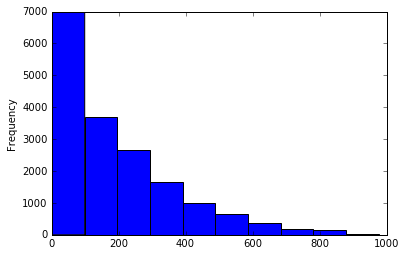

In [12]:
%matplotlib inline
bike_rentals['cnt'].plot.hist()

In [13]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [15]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [16]:
bike_rentals["time_label"].sample(5)

10948    1
13551    3
3243     4
16154    3
3434     4
Name: time_label, dtype: int64

## Linear Regression

In [44]:
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [45]:
from sklearn.linear_model import LinearRegression
predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
predictions = reg.predict(test[predictors])

mse=mean_squared_error(predictions,test['cnt'])
mse

2739.7281038230403

In [49]:
rmse=mse**(0.5)
rmse

131.90067634788093

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

## Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [65]:
predict=reg.predict(test[predictors])
mse1=mean_squared_error(predict, test['cnt'])
mse1

2442.2451859064413

In [66]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])
predict=reg.predict(test[predictors])
mse2=mean_squared_error(predict, test['cnt'])
mse2

2668.8315272982991

In [68]:
reg = DecisionTreeRegressor(max_depth=10)

reg.fit(train[predictors], train["cnt"])
predict=reg.predict(test[predictors])
mse3=mean_squared_error(predict, test['cnt'])
mse3

3124.4559321806123

In [69]:
reg = DecisionTreeRegressor(max_depth=15)

reg.fit(train[predictors], train["cnt"])
predict=reg.predict(test[predictors])
mse4=mean_squared_error(predict, test['cnt'])
mse4

2653.8159204213007

## Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=2,max_depth=15)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [90]:
predictions = reg.predict(test[predictors])


In [91]:
mse5=mean_squared_error(predictions,test['cnt'])
mse5

1755.0161654125905

The random forest regressor has lesser error and more accuracy than the decison tree regressor.